In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
df_movie_1 = pd.read_csv("Expanded_data/movie.expanded_metadata.tsv",sep='\t')
print(df_movie_1.shape)
df_movie_1.head()

(81741, 9)


Wikipedia movie ID Freebase movie ID         Movie name Movie release date  \
0            142780.0         /m/011_mj         The Circus         1928-01-06   
1            142786.0         /m/011_p6        Thunderbolt               1929   
2            142822.0         /m/011_zy  The Green Goddess         1930-02-13   
3            142049.0         /m/011wtv    Minority Report         2002-06-17   
4            142327.0         /m/011x_4      Groundhog Day         1993-02-12   

   Movie box office revenue  Movie runtime  \
0                       NaN           68.0   
1                       NaN           91.0   
2                       NaN           73.0   
3               358372926.0          139.0   
4                70906973.0          101.0   

           Movie languages (Freebase ID:name tuples)  \
0  {"/m/06ppq": "Silent film", "/m/02h40lc": "Eng...   
1                 {"/m/02h40lc": "English Language"}   
2                 {"/m/02h40lc": "English Language"}   
3  {"/m/06mp7": "Swedish Language", "/m/02h40lc":...   
4  {"/m/064_8sq": "French Language", "/m/02bjrlw"...   

   Movie countries (Freebase ID:name tuples)  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2  {"/m/09c7w0": "United States of America"}   
3  {"/m/09c7w0": "United States of America"}   
4  {"/m/09c7w0": "United States of America"}   

              Movie genres (Freebase ID:name tuples)  
0  {"/m/06cvj": "Romantic comedy", "/m/06ppq": "S...  
1  {"/m/07s9rl0": "Drama", "/m/01g6gs": "Black-an...  
2  {"/m/02rd8h3": "Goat gland", "/m/07s9rl0": "Dr...  
3  {"/m/0lsxr": "Crime Fiction", "/m/01jfsb": "Th...  
4  {"/m/06cvj": "Romantic comedy", "/m/07s9rl0": ...

In [2]:
df_movie = pd.read_csv("Expanded_data/IMDB_wiki.tsv",sep='\t')
print(df_movie.shape)
df_movie.head()

C:\Users\lisap\AppData\Local\Temp/ipykernel_13608/1548154688.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie = pd.read_csv("Expanded_data/IMDB_wiki.tsv",sep='\t')


(9385370, 9)


Freebase movie ID     Movie name Movie release date  genre1  genre2 genre3  \
0       /m/0100_m55  Urban Animals               1987  Comedy  Sci-Fi    NaN   
1       /m/0100_mnm            NaN               1999  Comedy     NaN    NaN   
2       /m/0100_nzr            NaN               1999   Drama     NaN    NaN   
3       /m/0100_pgp            NaN               1988  Comedy     NaN    NaN   
4       /m/0100_pz9            NaN               1985  Comedy     NaN    NaN   

   averageRating  numVotes  Movie box office revenue  
0            5.2      79.0                       NaN  
1            5.8      15.0                       NaN  
2            4.8     119.0                       NaN  
3            6.8     103.0                       NaN  
4            2.4      59.0                       NaN

In [5]:
print('Sum of NaN in each feature : ')
df_movie.isna().sum(axis = 0)

Sum of NaN in each feature : 


Freebase movie ID           9262986
Movie name                  8059519
Movie release date             6661
genre1                        23280
genre2                      5393432
genre3                      7833573
averageRating               8139222
numVotes                    8139222
Movie box office revenue    9375163
dtype: int64

### Genre distribution

In [6]:
#remove nan
df_genre = df_movie[~df_movie['genre1'].isna()]
#remove '\N' 
df_genre = df_genre[df_genre.genre1 != "\\N"]


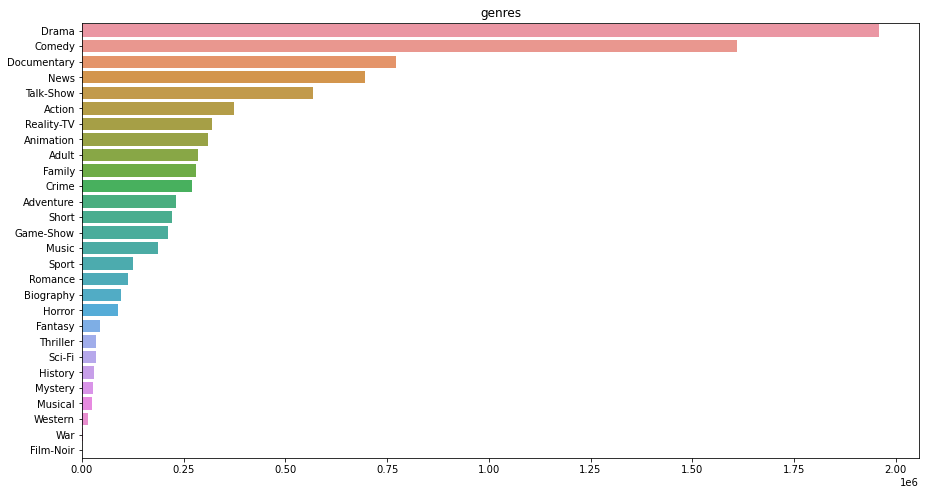

In [7]:
count_genre = df_genre.genre1.value_counts()

plt.figure(figsize=(15,8))
ax = sns.barplot(x=count_genre.values, y=count_genre.index).set(title='genres')
plt.show()


### Year distribution

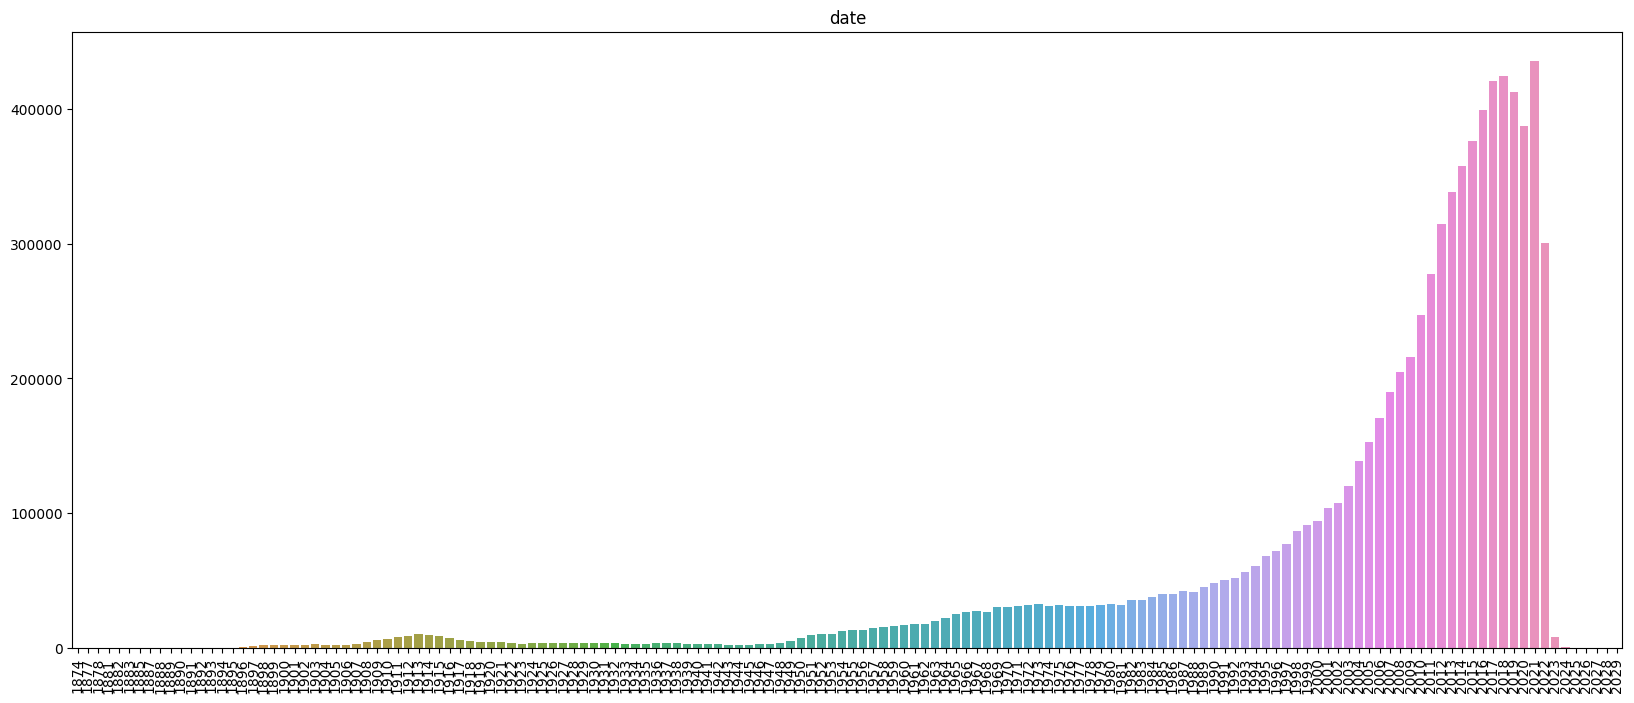

In [7]:
df_date = df_movie[~df_movie['Movie release date'].isna()]
df_date = df_date[df_date['Movie release date'] != "\\N"]

df_date['Movie release date'] = pd.to_datetime(df_date['Movie release date'], errors='coerce') # ajoute 01-01 pour ceux sans jour et mois
df_date['Movie release year'] = df_date['Movie release date'].dt.year.astype('Int64')
count_per_year = df_date['Movie release year'].value_counts()
plt.figure(figsize=(20,8))
ax = sns.barplot(x=count_per_year.index, y=count_per_year.values).set(title='date')
plt.xticks(rotation='vertical')
plt.show()

In [8]:
print(count_per_year[1896])
print(count_per_year[1897])
print(count_per_year[2023])
print(count_per_year[2024])

# 1897 : more than 1000 movies until 2023

900
1372
8291
442


### Genre per year

In [9]:
#remove nan
df_genre_date = df_date[~df_date['genre1'].isna()]
#remove '\N' 
df_genre_date = df_genre_date[df_genre_date.genre1 != "\\N"]

<AxesSubplot: xlabel='Movie release year'>

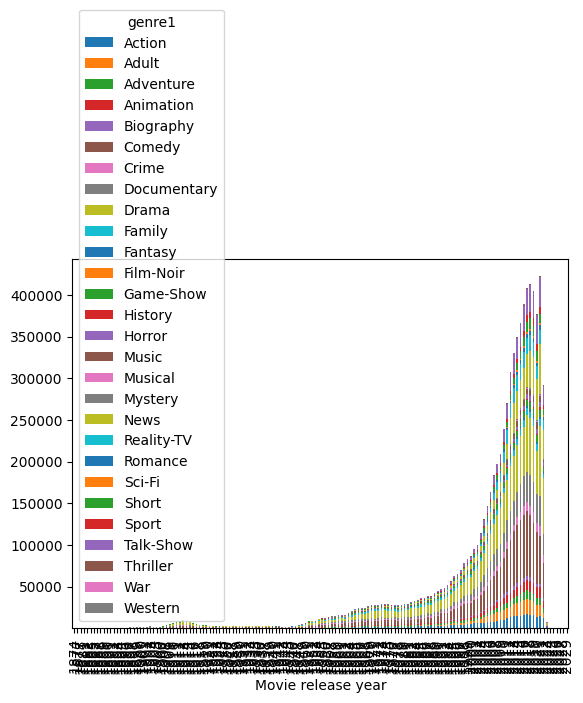

In [10]:
df_genre_date.groupby(['Movie release year', 'genre1']).size().unstack().plot(kind='bar', stacked=True)
#illisible

In [11]:
# Plot relative number of genres per year

cross_tab_prop = pd.crosstab(index=df_genre_date['Movie release year'],
                             columns=df_genre_date['genre1'],
                             normalize="index")
cross_tab_prop

genre1                Action  Adult  Adventure  Animation  Biography  \
Movie release year                                                     
1874                0.000000    0.0   0.000000   0.000000    0.00000   
1877                0.000000    0.0   0.000000   1.000000    0.00000   
1878                0.000000    0.0   0.000000   0.500000    0.00000   
1881                0.000000    0.0   0.000000   0.500000    0.00000   
1882                0.000000    0.0   0.000000   0.000000    0.00000   
...                      ...    ...        ...        ...        ...   
2025                0.282609    0.0   0.043478   0.010870    0.01087   
2026                0.170732    0.0   0.439024   0.097561    0.02439   
2027                0.444444    0.0   0.166667   0.000000    0.00000   
2028                0.714286    0.0   0.000000   0.285714    0.00000   
2029                1.000000    0.0   0.000000   0.000000    0.00000   

genre1                Comedy     Crime  Documentary     Drama   Family  ...  \
Movie release year                                                      ...   
1874                0.000000  0.000000     1.000000  0.000000  0.00000  ...   
1877                0.000000  0.000000     0.000000  0.000000  0.00000  ...   
1878                0.000000  0.000000     0.500000  0.000000  0.00000  ...   
1881                0.000000  0.000000     0.500000  0.000000  0.00000  ...   
1882                0.000000  0.000000     1.000000  0.000000  0.00000  ...   
...                      ...       ...          ...       ...      ...  ...   
2025                0.260870  0.010870     0.097826  0.108696  0.01087  ...   
2026                0.073171  0.024390     0.024390  0.073171  0.00000  ...   
2027                0.000000  0.055556     0.055556  0.166667  0.00000  ...   
2028                0.000000  0.000000     0.000000  0.000000  0.00000  ...   
2029                0.000000  0.000000     0.000000  0.000000  0.00000  ...   

genre1              News  Reality-TV  Romance    Sci-Fi     Short  Sport  \
Movie release year                                                         
1874                 0.0         0.0      0.0  0.000000  0.000000    0.0   
1877                 0.0         0.0      0.0  0.000000  0.000000    0.0   
1878                 0.0         0.0      0.0  0.000000  0.000000    0.0   
1881                 0.0         0.0      0.0  0.000000  0.000000    0.0   
1882                 0.0         0.0      0.0  0.000000  0.000000    0.0   
...                  ...         ...      ...       ...       ...    ...   
2025                 0.0         0.0      0.0  0.010870  0.043478    0.0   
2026                 0.0         0.0      0.0  0.000000  0.000000    0.0   
2027                 0.0         0.0      0.0  0.055556  0.000000    0.0   
2028                 0.0         0.0      0.0  0.000000  0.000000    0.0   
2029                 0.0         0.0      0.0  0.000000  0.000000    0.0   

genre1              Talk-Show  Thriller  War  Western  
Movie release year                                     
1874                      0.0       0.0  0.0      0.0  
1877                      0.0       0.0  0.0      0.0  
1878                      0.0       0.0  0.0      0.0  
1881                      0.0       0.0  0.0      0.0  
1882                      0.0       0.0  0.0      0.0  
...                       ...       ...  ...      ...  
2025                      0.0       0.0  0.0      0.0  
2026                      0.0       0.0  0.0      0.0  
2027                      0.0       0.0  0.0      0.0  
2028                      0.0       0.0  0.0      0.0  
2029                      0.0       0.0  0.0      0.0  

[150 rows x 28 columns]

In [12]:
cross_tab = pd.crosstab(index=df_genre_date['Movie release year'],
                        columns=df_genre_date['genre1'])
cross_tab

genre1              Action  Adult  Adventure  Animation  Biography  Comedy  \
Movie release year                                                           
1874                     0      0          0          0          0       0   
1877                     0      0          0          4          0       0   
1878                     0      0          0          1          0       0   
1881                     0      0          0          1          0       0   
1882                     0      0          0          0          0       0   
...                    ...    ...        ...        ...        ...     ...   
2025                    26      0          4          1          1      24   
2026                     7      0         18          4          1       3   
2027                     8      0          3          0          0       0   
2028                     5      0          0          2          0       0   
2029                     3      0          0          0          0       0   

genre1              Crime  Documentary  Drama  Family  ...  News  Reality-TV  \
Movie release year                                     ...                     
1874                    0            1      0       0  ...     0           0   
1877                    0            0      0       0  ...     0           0   
1878                    0            1      0       0  ...     0           0   
1881                    0            1      0       0  ...     0           0   
1882                    0            2      0       0  ...     0           0   
...                   ...          ...    ...     ...  ...   ...         ...   
2025                    1            9     10       1  ...     0           0   
2026                    1            1      3       0  ...     0           0   
2027                    1            1      3       0  ...     0           0   
2028                    0            0      0       0  ...     0           0   
2029                    0            0      0       0  ...     0           0   

genre1              Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller  War  \
Movie release year                                                            
1874                      0       0      0      0          0         0    0   
1877                      0       0      0      0          0         0    0   
1878                      0       0      0      0          0         0    0   
1881                      0       0      0      0          0         0    0   
1882                      0       0      0      0          0         0    0   
...                     ...     ...    ...    ...        ...       ...  ...   
2025                      0       1      4      0          0         0    0   
2026                      0       0      0      0          0         0    0   
2027                      0       1      0      0          0         0    0   
2028                      0       0      0      0          0         0    0   
2029                      0       0      0      0          0         0    0   

genre1              Western  
Movie release year           
1874                      0  
1877                      0  
1878                      0  
1881                      0  
1882                      0  
...                     ...  
2025                      0  
2026                      0  
2027                      0  
2028                      0  
2029                      0  

[150 rows x 28 columns]

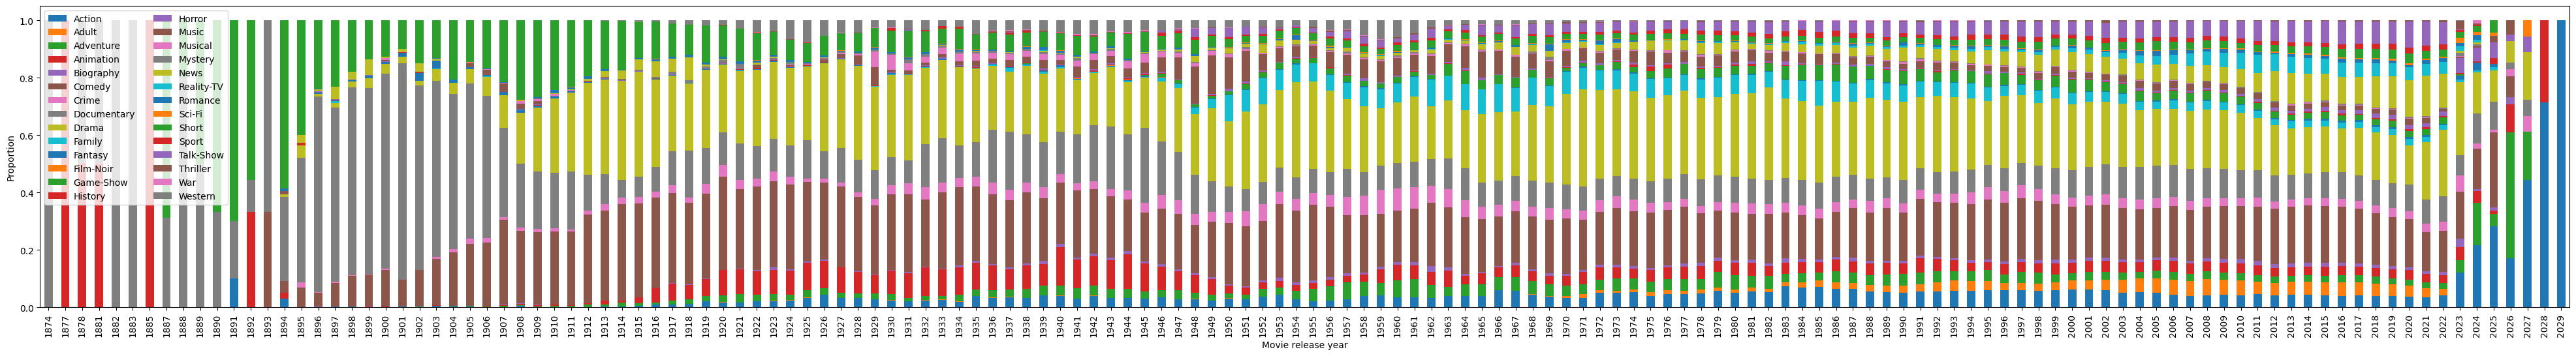

In [13]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True,  
                    figsize=(50, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Movie release year")
plt.ylabel("Proportion")
plt.show()

#### Genre per year (retirer valeurs rares)

In [17]:
# Reduce number of genres (otherwise not lisibe on the graphs)
thr_genre = 300000 #minimal number of movies with a certain genre

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = count_genre[count_genre <= thr_genre].index

# Keep rows where the city column is not in to_remove
df_genre_date_thr = df_genre_date[~df_genre_date.genre1.isin(to_remove)]

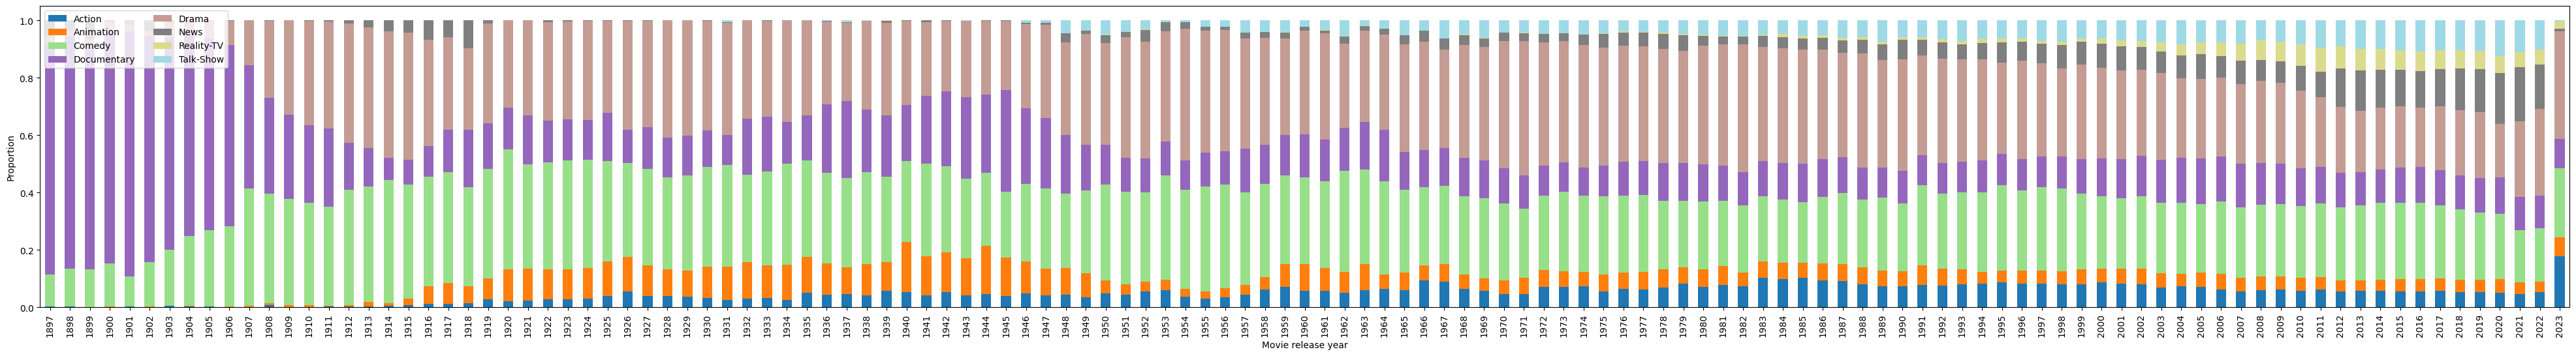

In [18]:
# print only from 1897 (more than 1000 movies)
df_genre_date_thr = df_genre_date_thr[df_genre_date_thr['Movie release year']>=1897]
df_genre_date_thr = df_genre_date_thr[df_genre_date_thr['Movie release year']<=2023]

cross_tab_prop = pd.crosstab(index=df_genre_date_thr['Movie release year'],
                             columns=df_genre_date_thr['genre1'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True,
                    colormap='tab20',
                    figsize=(50, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Movie release year")
plt.ylabel("Proportion")
plt.show()

## An overview of rating and revenue

The rating is represented in the column 'averageRating' and it ranges from 0 to 10, where 10 is the best score and 0 is the lowest.

Since we want to consider both the rating and the revenu at the same time, we remove the rows that have NaN in the column 'averageRating' or 'Movie box office revenue'.

In [43]:
revenue = df_movie.copy()
revenue = revenue[revenue['Movie box office revenue'].notna()]
revenue = revenue[revenue['averageRating'].notna()]

In [44]:
revenue['averageRating'].describe()

count    9570.000000
mean        6.352456
std         1.021944
min         1.000000
25%         5.800000
50%         6.400000
75%         7.000000
max         9.300000
Name: averageRating, dtype: float64

In [45]:
revenue.head()

Freebase movie ID          Movie name Movie release date     genre1  \
9         /m/0100blym  Testament of Youth               2014  Biography   
33        /m/0100khzv           Leviathan               2014      Crime   
231       /m/0105j_71                 Spy               2015     Action   
303       /m/0106bp29       The Last Face               2016      Drama   
465       /m/0109gmqq         Babysitting               2014     Comedy   

      genre2   genre3  averageRating  numVotes  Movie box office revenue  
9      Drama  History            7.2   29157.0                 1800000.0  
33     Drama      NaN            7.6   53861.0                 4100000.0  
231   Comedy      NaN            7.0  245920.0               235700000.0  
303  Romance      War            4.9    5159.0                 1200000.0  
465      NaN      NaN            6.7   10765.0                 1080000.0

In [46]:
revenue['Movie release date'] = pd.to_datetime(revenue['Movie release date'], errors='coerce')
revenue['Movie release date'] = revenue['Movie release date'].dt.year.astype('Int64')

### Plots

Let's plot the variables!

In [47]:
years = revenue['Movie release date'].unique()
mean_revenue = np.zeros_like(years)
median_revenue = np.zeros_like(years)
mean_rating = np.zeros_like(years)
median_rating = np.zeros_like(years)
for i,y in enumerate(years):
    
    rev = revenue.loc[revenue['Movie release date'] == y]['Movie box office revenue']
    rat = revenue.loc[revenue['Movie release date'] == y]['averageRating']
    
    mean = np.mean(rev)
    median = np.median(rev)
    mean_revenue[i] = mean
    median_revenue[i] = median
    
    mean = np.mean(rat)
    median = np.median(rat)
    mean_rating[i] = mean
    median_rating[i] = median

C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


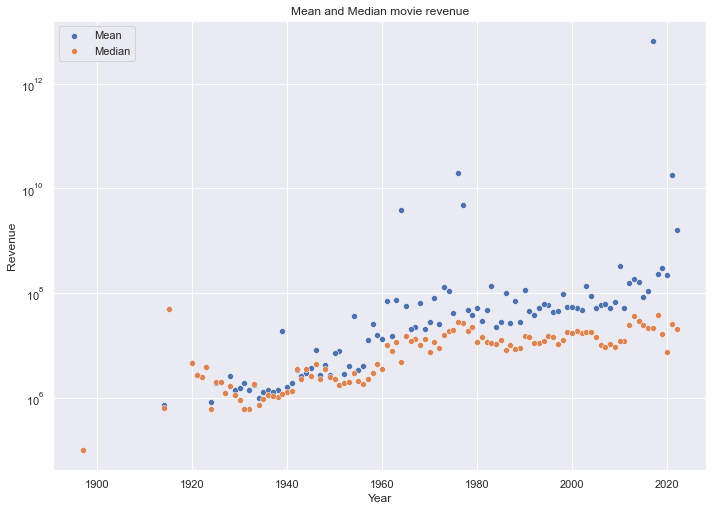

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(years, mean_revenue,label='Mean')
splot = sns.scatterplot(years, median_revenue,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


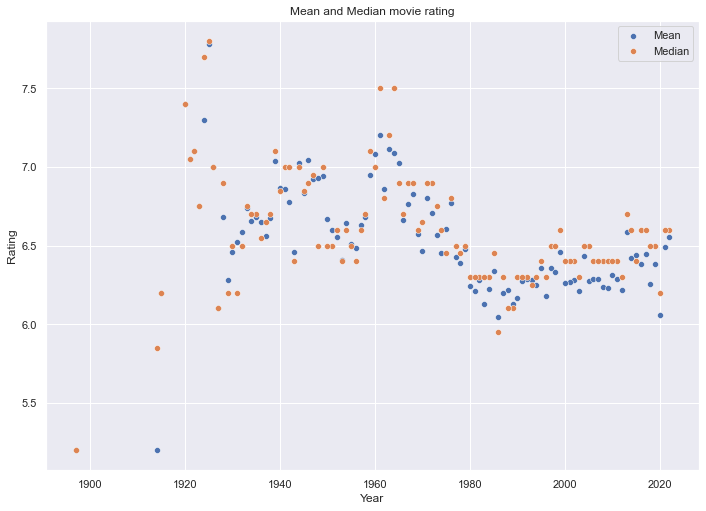

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(years, mean_rating,label='Mean')
splot = sns.scatterplot(years, median_rating,label='Median')
plt.title('Mean and Median movie rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

Let's try to do some statistics. It seems that the mean rating and the mean revenue are not linearly correlated. The median values seem to be significantly correlated but the coefficient is quite small (-0.2).

In [50]:
stats.pearsonr(mean_rating,mean_revenue)

(-0.024072580938038664, 0.806503485956121)

In [51]:
stats.pearsonr(median_rating,median_revenue)

(-0.19916442838153042, 0.04068130548378155)

In order to really draw conclusion we should take into consideration the inflation!

In [18]:
df_inflation = pd.read_csv("Inflation_data/inflation.csv",header=2)
df_inflation.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                          Indicator Name  Indicator Code  1960  1961  1962  \
0  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
1  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
2  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
3  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
4  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   

   1963  1964  1965  ...      2013      2014      2015       2016       2017  \
0   NaN   NaN   NaN  ... -2.372065  0.421441  0.474764  -0.931196  -1.028282   
1   NaN   NaN   NaN  ...  5.750981  5.370290  5.250171   6.571396   6.399343   
2   NaN   NaN   NaN  ...  7.385772  4.673996 -0.661709   4.383892   4.975952   
3   NaN   NaN   NaN  ...  2.439201  1.758052  2.130268   1.494564   1.764635   
4   NaN   NaN   NaN  ...  8.777814  7.280387  9.150372  30.695313  29.843587   

        2018       2019      2020      2021  Unnamed: 66  
0   3.626041   4.257462       NaN       NaN          NaN  
1   4.720811   4.120246  5.404815  7.240978          NaN  
2   0.626149   2.302373       NaN       NaN          NaN  
3   1.784050   1.758565  2.492522  3.925603          NaN  
4  19.628608  17.081215       NaN       NaN          NaN  

[5 rows x 67 columns]

In [30]:
usa_inflation = df_inflation.loc[df_inflation["Country Code"]=="USA"]

In [42]:
usa_inflation.head()

Country Name Country Code                         Indicator Name  \
251  United States          USA  Inflation, consumer prices (annual %)   

     Indicator Code      1960      1961      1962      1963      1964  \
251  FP.CPI.TOTL.ZG  1.457976  1.070724  1.198773  1.239669  1.278912   

         1965  ...      2013      2014      2015      2016     2017      2018  \
251  1.585169  ...  1.464833  1.622223  0.118627  1.261583  2.13011  2.442583   

        2019      2020      2021  Unnamed: 66  
251  1.81221  1.233584  4.697859          NaN  

[1 rows x 67 columns]

In [37]:
for i in range(2021-1960):
    x = i+1960
    print(usa_inflation[str(x)])

251    1.457976
Name: 1960, dtype: float64
251    1.070724
Name: 1961, dtype: float64
251    1.198773
Name: 1962, dtype: float64
251    1.239669
Name: 1963, dtype: float64
251    1.278912
Name: 1964, dtype: float64
251    1.585169
Name: 1965, dtype: float64
251    3.015075
Name: 1966, dtype: float64
251    2.772786
Name: 1967, dtype: float64
251    4.271796
Name: 1968, dtype: float64
251    5.462386
Name: 1969, dtype: float64
251    5.838255
Name: 1970, dtype: float64
251    4.292767
Name: 1971, dtype: float64
251    3.272278
Name: 1972, dtype: float64
251    6.17776
Name: 1973, dtype: float64
251    11.054805
Name: 1974, dtype: float64
251    9.143147
Name: 1975, dtype: float64
251    5.744813
Name: 1976, dtype: float64
251    6.501684
Name: 1977, dtype: float64
251    7.630964
Name: 1978, dtype: float64
251    11.254471
Name: 1979, dtype: float64
251    13.549202
Name: 1980, dtype: float64
251    10.334715
Name: 1981, dtype: float64
251    6.131427
Name: 1982, dtype: float64
251    3

In [56]:
inflation_coef = np.zeros(62)
inflation_coef[0] = usa_inflation["1960"]

In [59]:
for i in range(61):
    year = i + 1961
    inflation_coef[i+1] = inflation_coef[i] * (1 + usa_inflation[str(year)])

In [60]:
inflation_coef

array([1.45797599e+00, 3.01906608e+00, 6.63824204e+00, 1.48674677e+01,
       3.38816441e+01, 8.75897849e+01, 3.51679589e+02, 1.32681170e+03,
       6.99468079e+03, 4.52023286e+04, 3.09105065e+05, 1.63602099e+06,
       6.98953689e+06, 5.01692188e+07, 6.04780139e+08, 6.13437378e+09,
       4.13752018e+10, 3.10383689e+11, 2.67891039e+12, 3.28286301e+13,
       4.77630370e+14, 5.41380428e+15, 3.86081500e+16, 1.62634331e+17,
       8.62049043e+17, 3.91856819e+18, 1.13561976e+19, 5.29717017e+19,
       2.68976587e+20, 1.56732739e+21, 1.00276924e+22, 5.24946082e+22,
       2.11491310e+23, 8.35741110e+23, 3.01488724e+24, 1.14729113e+25,
       4.51023569e+25, 1.50537683e+26, 3.84214182e+26, 1.22488526e+27,
       5.36114796e+27, 2.05126695e+28, 5.30464120e+28, 1.73466805e+29,
       6.37878502e+29, 2.80203878e+30, 1.18412592e+31, 4.56204936e+31,
       2.20762144e+32, 1.42270988e+32, 3.75601589e+32, 1.56131630e+33,
       4.79220630e+33, 1.18119866e+34, 3.09736626e+34, 3.46479795e+34,
      